In [1]:
#import files 
import os
import shutil
import random
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

0.Image Preparation

In [ ]:
#Change picture's names
file_path = 'PetImages/Dog'
prefix = 'dog.'
for count, filename in enumerate(os.listdir(file_path)):
        dst =  prefix + str(count) + ".jpg"
        # rename all the files
        os.rename(os.path.join(file_path, filename),  os.path.join(file_path, dst))


In [2]:
pwd

'F:\\Uni\\Bachelor Project\\data'

In [125]:
#organize files, train and test and validation
os.chdir('data/dogs-vs-cats/')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('resultTest')
#for testing the last result(trained model) file - 1000 images of dogs and cats
for c in random.sample(glob.glob("cat*"), 500):
    shutil.move(c, 'resultTest/cat' )
for c in random.sample(glob.glob("dog*"), 500):
    shutil.move(c, 'resultTest/dog' )
##for train file
#for c in random.sample(glob.glob("cat*"), 500):
#    shutil.move(c, 'train/cat' )
#for c in random.sample(glob.glob("dog*"), 500):
#    shutil.move(c, 'train/dog' )
##for test file
#for c in random.sample(glob.glob("cat*"), 100):
#    shutil.move(c, 'test/cat' )
#for c in random.sample(glob.glob("dog*"), 100):
#    shutil.move(c, 'test/dog' )
##for validation file
#for c in random.sample(glob.glob("cat*"), 50):
#    shutil.move(c, 'valid/cat' )
#for c in random.sample(glob.glob("dog*"), 50):
#    shutil.move(c, 'valid/dog' )
os.chdir('../../')

In [2]:
train_path = 'data/dogs-vs-cats/train'
test_path = 'data/dogs-vs-cats/test'
valid_path = 'data/dogs-vs-cats/valid'

In [3]:
os.chdir('/Uni/Bachelor Project')


In [4]:
pwd

'F:\\Uni\\Bachelor Project'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224),
    color_mode='rgb', classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224),
    color_mode='rgb', classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224),
    color_mode='rgb', classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert test_batches.n == 200
assert valid_batches.n == 100


In [7]:
imgs, labels = next(train_batches)

In [8]:
#visualize data in vgg16 format
def plotImages(image_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

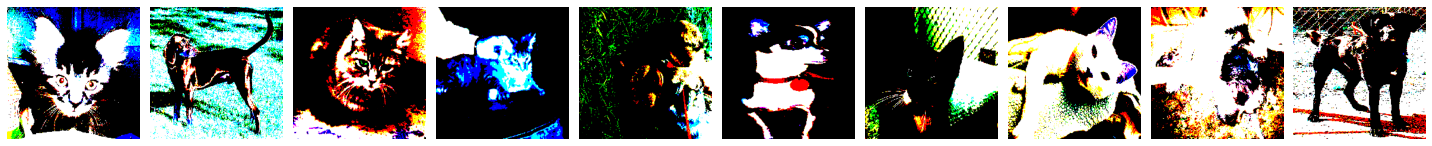

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

1.Build & Train CNN Model

In [11]:
#Self made CNN
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [10]:
model = tf.keras.applications.vgg16.VGG16()

In [67]:
# Save model in .tf format
model.save('./vgg16_tf',save_format='tf')
# loading the saved model
#loaded_model = tf.keras.models.load_model('./vgg16_tf')

# retraining the model
#loaded_model.fit(x_train, y_train, epochs = 10, validation_data = (x_test,y_test),verbose=1)

# Save model in .h5 format
model.save('./vgg16.h5', save_format='h5')
# loading the saved model
#loaded_model_h5 = tf.keras.models.load_model('./vgg16.h5')

INFO:tensorflow:Assets written to: ./vgg16_tf\assets


In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
sample_model = Sequential()
for layer in model.layers[:-1]:
    sample_model.add(layer)

In [13]:
sample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in sample_model.layers:
    layer.trainable = False

In [15]:
sample_model.add(Dense(units=2, activation='softmax'))

In [16]:
sample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
sample_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = sample_model.fit(x=train_batches , validation_data=valid_batches , epochs=3, verbose=2)

Epoch 1/3
100/100 - 435s - loss: 0.1147 - accuracy: 0.9580 - val_loss: 0.1148 - val_accuracy: 0.9800 - 435s/epoch - 4s/step
Epoch 2/3
100/100 - 439s - loss: 0.0735 - accuracy: 0.9820 - val_loss: 0.1072 - val_accuracy: 0.9800 - 439s/epoch - 4s/step
Epoch 3/3
100/100 - 436s - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0964 - val_accuracy: 0.9800 - 436s/epoch - 4s/step


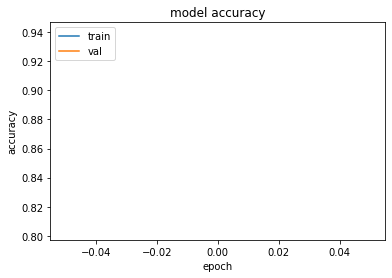

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

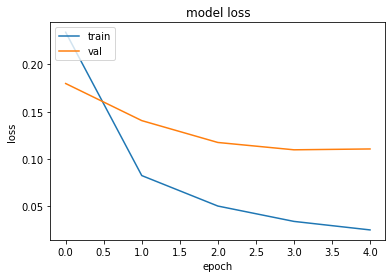

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2.Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

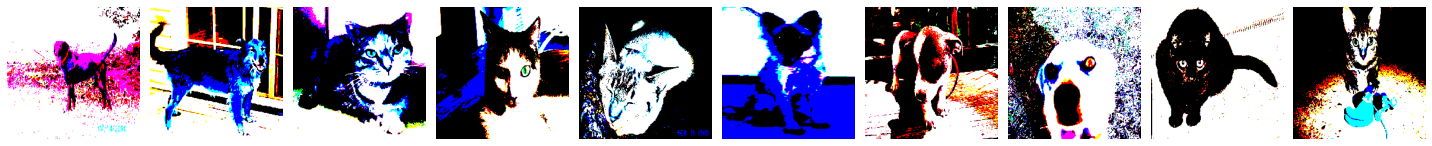

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [25]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [26]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
sample_predictions = sample_model.predict(x=test_batches, verbose=0)

In [35]:
np.round(sample_predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [36]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(sample_predictions, axis=-1))

In [37]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color='red' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[53 47]
 [46 54]]


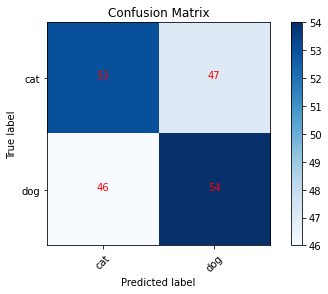

In [39]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

3.Preforming Data Augmentation

In [40]:
gen = ImageDataGenerator(rotation_range=10, 
                         width_shift_range=0.1, height_shift_range=0.1,
                         shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10., horizontal_flip=True)

In [41]:
pwd

'F:\\Uni\\Bachelor Project'

In [42]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))
print(chosen_image)

dog.10438.jpg


In [43]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image
print(image_path)

data/dogs-vs-cats/train/dog/dog.10438.jpg


In [44]:
assert os.path.isfile(image_path)

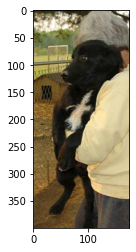

In [45]:
#obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [46]:
#Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [47]:
#Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

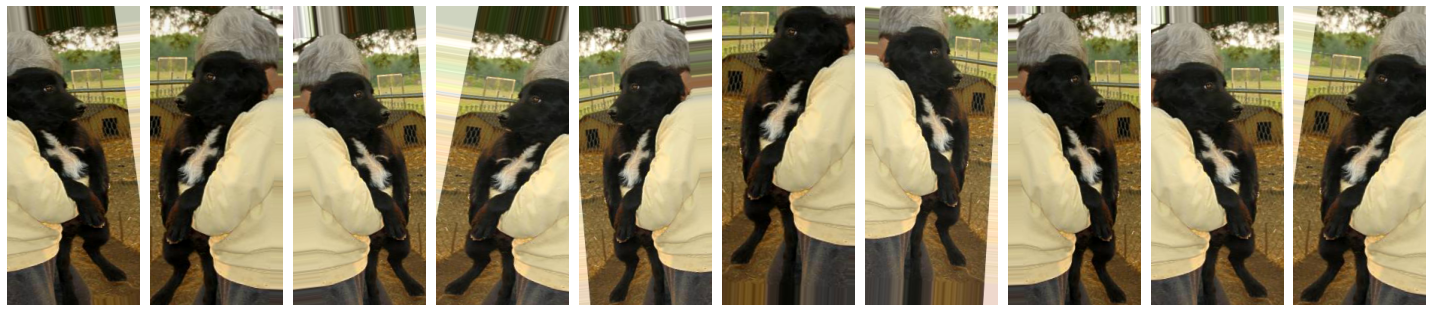

In [48]:
plotImages(aug_images)

3.1 Train with Augmented Data

In [49]:
aug_train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rotation_range=10, 
                         width_shift_range=0.1, height_shift_range=0.1,
                         shear_range=0.15, zoom_range=0.1, brightness_range=[0.2,1.0], rotation_range=20,
                        channel_shift_range=10., horizontal_flip=True).flow_from_directory(directory=train_path, target_size=(224, 224),
    color_mode='rgb', classes=['cat', 'dog'], batch_size=10)()
print(aug_train_batches.n)

Found 1000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

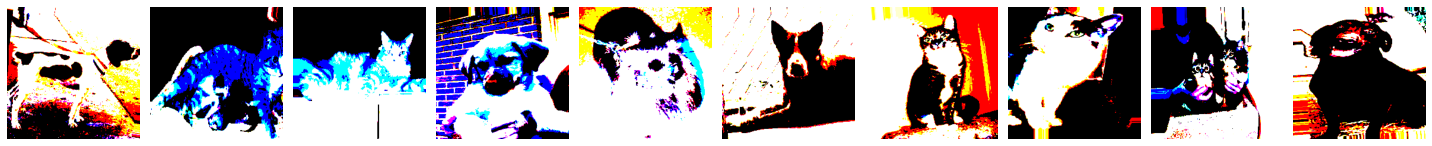

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [50]:
imgs, labels = next(aug_train_batches)
plotImages(imgs)
print(labels)

In [51]:
aug_model = sample_model
aug_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [52]:
aug_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
aug_history = aug_model.fit(x=aug_train_batches , validation_data=valid_batches , epochs=3, verbose=2)

Epoch 1/5
100/100 - 443s - loss: 0.0171 - accuracy: 0.9960 - val_loss: 0.1033 - val_accuracy: 0.9700 - 443s/epoch - 4s/step
Epoch 2/5
100/100 - 445s - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.1011 - val_accuracy: 0.9700 - 445s/epoch - 4s/step
Epoch 3/5
100/100 - 443s - loss: 0.0139 - accuracy: 0.9980 - val_loss: 0.1054 - val_accuracy: 0.9600 - 443s/epoch - 4s/step
Epoch 4/5
100/100 - 465s - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.1061 - val_accuracy: 0.9700 - 465s/epoch - 5s/step
Epoch 5/5
100/100 - 449s - loss: 0.0164 - accuracy: 0.9940 - val_loss: 0.1081 - val_accuracy: 0.9700 - 449s/epoch - 4s/step


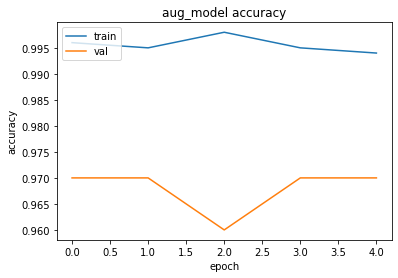

In [63]:
plt.plot(aug_history.history['accuracy'])
plt.plot(aug_history.history['val_accuracy'])
plt.title('aug_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

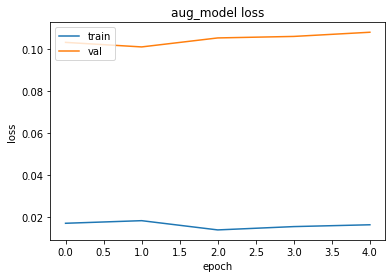

In [64]:
plt.plot(aug_history.history['loss'])
plt.plot(aug_history.history['val_loss'])
plt.title('aug_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[52 48]
 [46 54]]


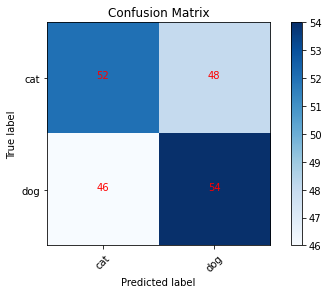

In [65]:
aug_predictions = aug_model.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(aug_predictions,axis=-1))
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [58]:
pwd

'F:\\Uni\\Bachelor Project'

In [59]:
resultTest_path = 'data/dogs-vs-cats/resultTest'
resultTest_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=resultTest_path, target_size=(224, 224),
    color_mode='rgb', classes=['cat', 'dog'], batch_size=10)
assert resultTest_batches.n == 1000

Found 1000 images belonging to 2 classes.


Confusion matrix, without normalization
[[248 252]
 [249 251]]


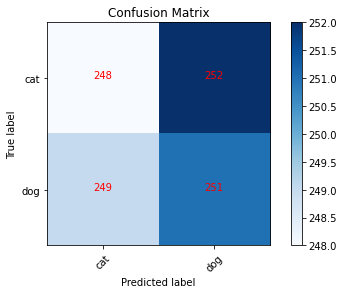

In [60]:
predictions = aug_model.predict(x=resultTest_batches, verbose=0)
cm = confusion_matrix(y_true=resultTest_batches.classes, y_pred=np.argmax(predictions,axis=-1))
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[259 241]
 [238 262]]


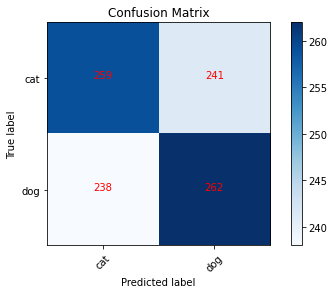

In [61]:
S_predictions = sample_model.predict(x=resultTest_batches, verbose=0)
cm = confusion_matrix(y_true=resultTest_batches.classes, y_pred=np.argmax(S_predictions,axis=-1))
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')